In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Data Loading and understanding

In [2]:
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# number of rows 
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Waterfront, yr_renovated,sqft_basement and view have some missing values. Also sqft_living is the sum of sqft_basement and sqft_above

In [5]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [6]:
#I replace ? in sqft_basement with sqft_living - sqft_above
df.loc[df['sqft_basement'] =='?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [7]:
# change basement to float
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [8]:
# replace the null waterfront values with 0
df['waterfront'].fillna(0, inplace = True)

In [9]:
# replace the null yr_renovated values with 0
df.yr_renovated.fillna(0, inplace = True)

In [10]:
# check summary statistics about the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


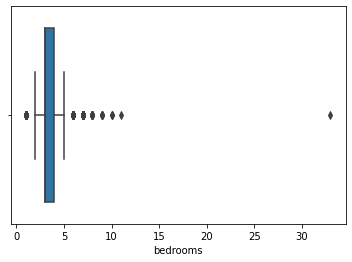

In [11]:
# a house with 33 bedrooms? Checking if it could be an outlier
sns.boxplot(x = 'bedrooms', data = df);

33 is just so far away from the other points, so it looks like its an outlier.I will remove it

In [12]:
df = df[df.bedrooms<33]

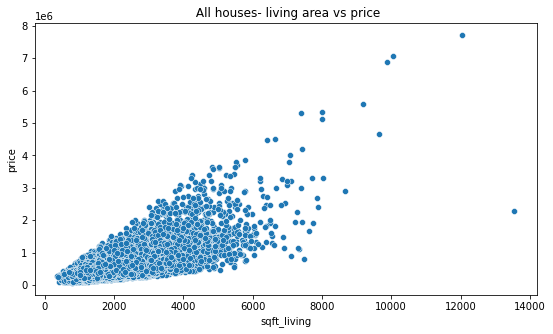

In [13]:
# checking sqft_living
fig,ax = plt.subplots(figsize=(9,5))
sns.scatterplot(x = 'sqft_living', y= 'price', ci= None,data = df )
ax.set_title(' All houses- living area vs price');

There is a linear relationship between the living room area and the price.however, I will remove the sqft_living areas greater than 9800, since they seem like outliers

In [14]:
df = df[df.sqft_living <= 9800]

#### Analysis on house prices

In [15]:
# I will set expensive houses to be greater than the mean
expensive_df = df[df.price > df.price.mean()]
cheaper_df =  df[df.price <= df.price.mean()]
len(expensive_df) / len(df)

0.37083178955168583

The expensive houses make up about 37 % of the data

#### making some comparisons to see the difference between the expensive and cheaper houses

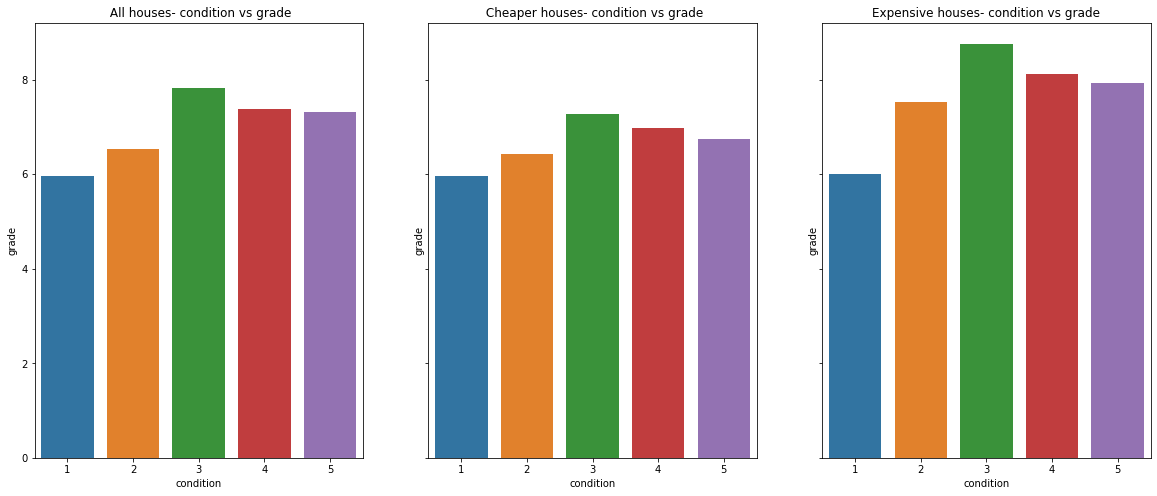

In [16]:
# compare the grade and condition of the houses
fig,(ax1,ax2,ax3) = plt.subplots(sharey= True,ncols=3, figsize=(20,8))
sns.barplot(x = 'condition', y= 'grade', ci= None,ax = ax1, data = df )
ax1.set_title(' All houses- condition vs grade')
sns.barplot(x = 'condition', y= 'grade', ci= None,ax = ax2, data = cheaper_df )
ax2.set_title(' Cheaper houses- condition vs grade')
sns.barplot(x = 'condition', y= 'grade', ci= None,ax = ax3, data = expensive_df)
ax3.set_title('Expensive houses- condition vs grade')
#plt.savefig('grade-condition.png', dpi=300) 
plt.show()

* For all classes of houses, a condition of 3 got the highest grading. Its surprising since its expected that a 
higher condition equals higher grading.
* For the same condition though,expensive houses have better grading. Like for cheaper houses, a condition of 3 has a grading of around 7.5 while it was almost 10 for the expensive ones

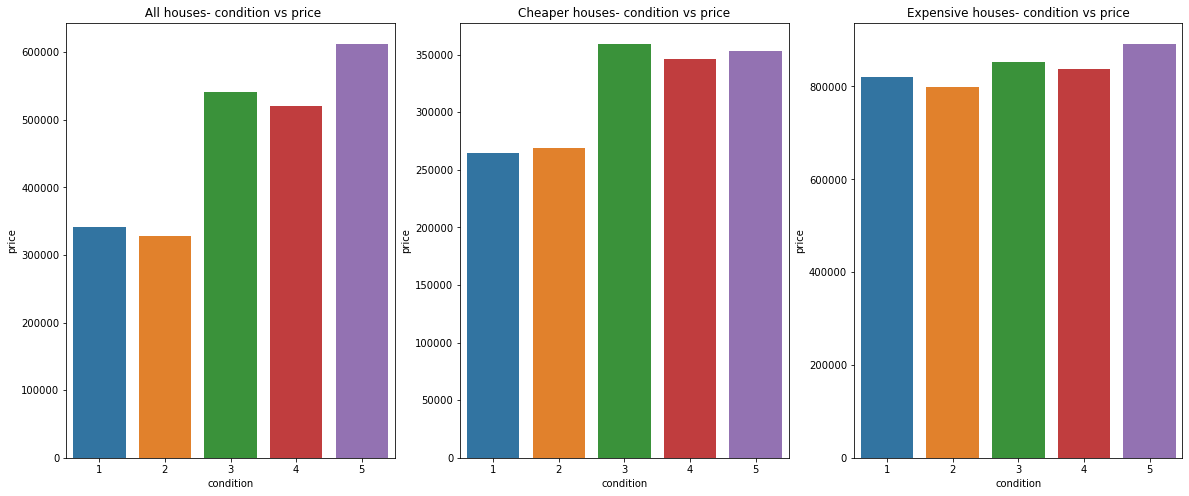

In [17]:
#condition vs price
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,8))
sns.barplot(x = 'condition', y= 'price', ci= None,ax = ax1, data = df )
ax1.set_title(' All houses- condition vs price')
sns.barplot(x = 'condition', y= 'price', ci= None,ax = ax2, data = cheaper_df )
ax2.set_title('Cheaper houses- condition vs price')
sns.barplot(x = 'condition', y= 'price', ci= None,ax = ax3, data = expensive_df)
ax3.set_title('Expensive houses- condition vs price')
#plt.savefig('condition-price.png', dpi=300) 
plt.show()

For cheaper houses,condition 1 and 2 don't fetch good prices. But from 3 onwards, the prices vary just by a bit.And for the expensive ones, the relationship is quite mixed. Although houses with condition 5 fetch the better prices, the other conditions are also not far off. It could be that there are just subtle changes in the house based on those conditions, that is, the difference in the way the houses look is not so huge for the different conditions

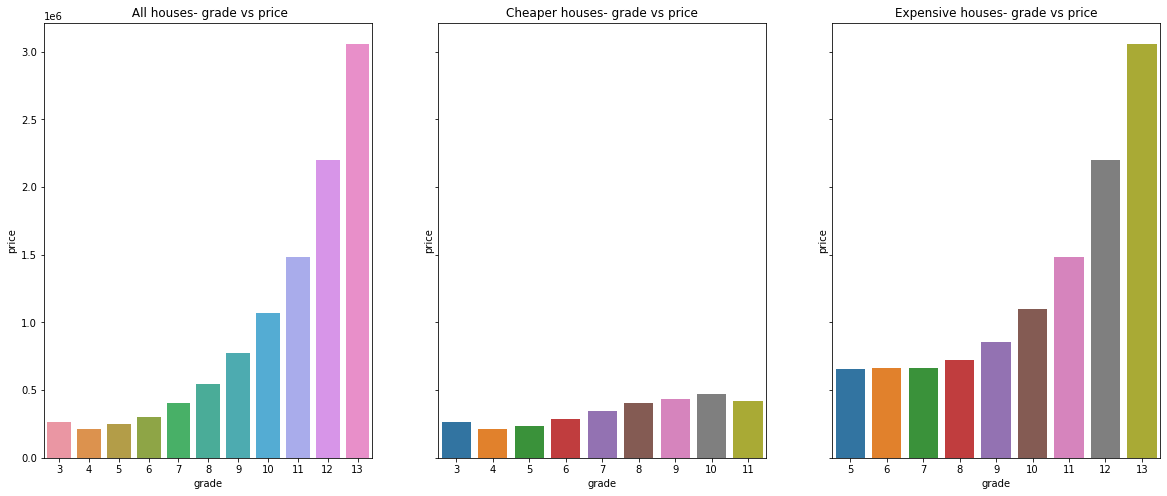

In [18]:
# grade vs price
fig,(ax1,ax2,ax3) = plt.subplots(sharey = True, ncols=3, figsize=(20,8))
sns.barplot(x = 'grade', y= 'price', ci= None,ax = ax1, data = df )
ax1.set_title(' All houses- grade vs price')
sns.barplot(x = 'grade', y= 'price', ci= None,ax = ax2, data = cheaper_df )
ax2.set_title('Cheaper houses- grade vs price')
sns.barplot(x = 'grade', y= 'price', ci= None,ax = ax3, data = expensive_df)
ax3.set_title('Expensive houses- grade vs price')
#plt.savefig('Grade-price.png', dpi=300) 
plt.show()

* There is a clear relationship between the grade and price of houses. The higher graded houses went for higher prices.
* There was a consistent increase in price for cheaper houses from grade 4 onwards upto grade 10. Its surprising that the price fell again at grade 11 and also was higher at grade 3 than 4 or 5.
* for the expensive ones, the change is not noticeable at first but start rising by huge margins from grade 9
* The expensive houses grade starts at 5 and goes all the way to 13, could be one of the reasons why they are more expensive


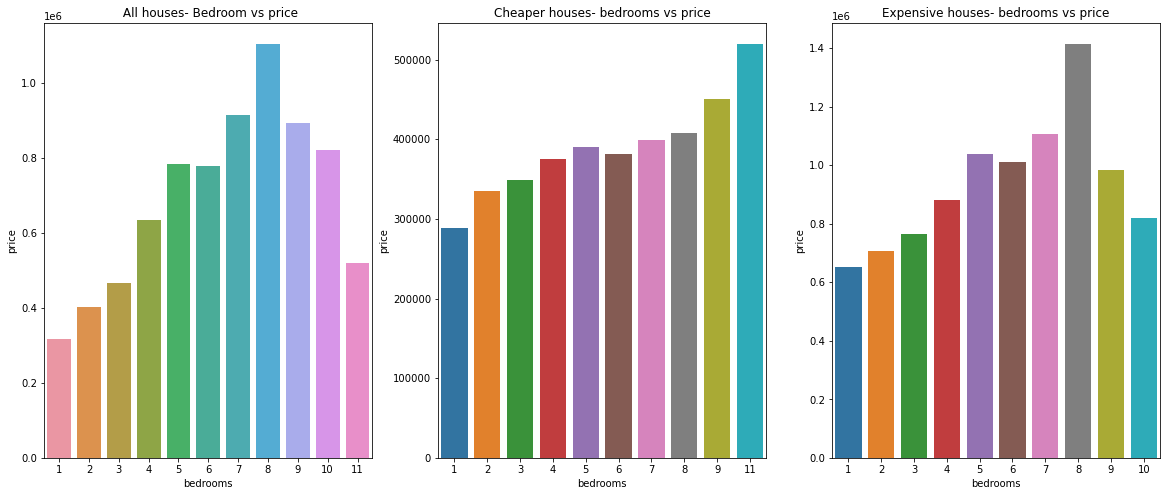

In [19]:
#number of bedrooms vs price
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,8))
sns.barplot(x = 'bedrooms', y= 'price', ci= None,ax = ax1, data = df )
ax1.set_title(' All houses- Bedroom vs price')
sns.barplot(x = 'bedrooms', y= 'price', ci= None,ax = ax2, data = cheaper_df )
ax2.set_title('Cheaper houses- bedrooms vs price')
sns.barplot(x = 'bedrooms', y= 'price',ci= None,ax = ax3, data = expensive_df)
ax3.set_title('Expensive houses- bedrooms vs price')
#plt.savefig('Bedrooms-price.png', dpi=300) 
plt.show()

* Overall, the number of bedrooms(until 8) increased prices until to some level then started falling
* For cheaper houses,there was a consistent increase in price as the bedrooms increased until upto 5 bedrooms, then for some reason it dipped slightly for 6 bedrooms,then went up again.
* For the expensive ones, same thing happened,a consistent increase until 5 bedrooms, then dipped at 6.Then up again until 8 then dipped again
* So although number of bedrooms could be a factor that affects the price, it seems there are other conditions that are affecting it

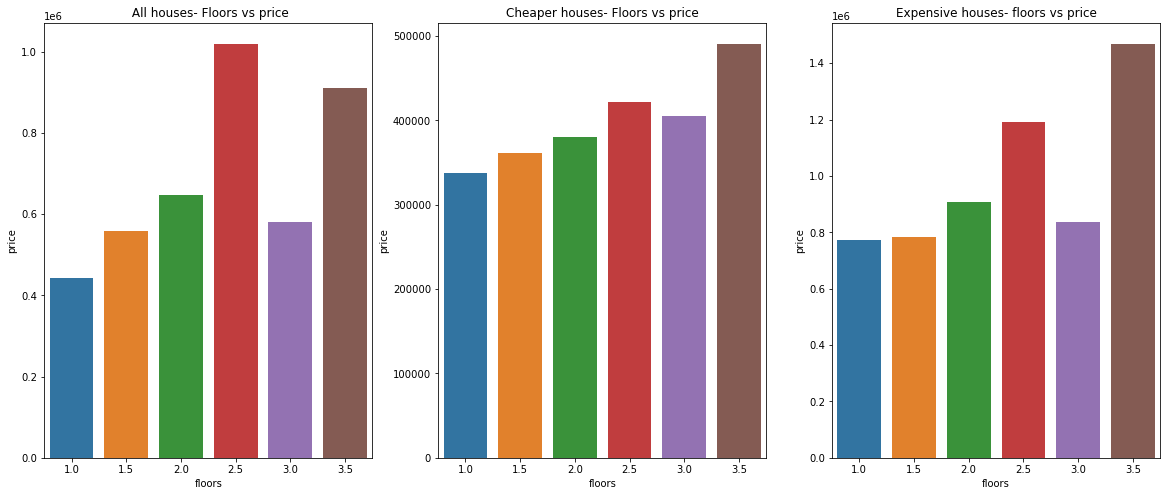

In [20]:
#number of bedrooms vs price
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,8))
sns.barplot(x = 'floors', y= 'price', ci= None,ax = ax1, data = df )
ax1.set_title(' All houses- Floors vs price')
sns.barplot(x = 'floors', y= 'price', ci= None,ax = ax2, data = cheaper_df )
ax2.set_title('Cheaper houses- Floors vs price')
sns.barplot(x = 'floors', y= 'price',ci= None,ax = ax3, data = expensive_df)
ax3.set_title('Expensive houses- floors vs price')
#plt.savefig('floors-price.png', dpi=300) 
plt.show()

* Price increases with increase in the number of floors but dips at 3 floors then goes up again

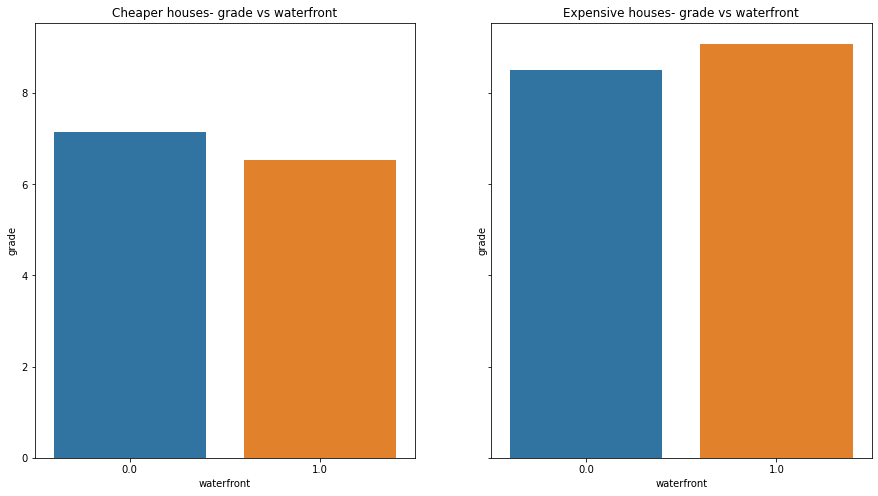

In [21]:
# grade vs waterfront
fig,(ax1,ax2) = plt.subplots(sharey = True, ncols=2, figsize=(15,8))
sns.barplot(x = 'waterfront', y= 'grade', ci= None,ax = ax1, data = cheaper_df )
ax1.set_title('Cheaper houses- grade vs waterfront')
sns.barplot(x = 'waterfront', y= 'grade', ci= None,ax = ax2, data = expensive_df)
ax2.set_title('Expensive houses- grade vs waterfront')
#plt.savefig('waterfront-grade.png', dpi=300) 
plt.show()

Expensive houses near a waterfront had high grading, which is surprisingly different for the cheaper houses

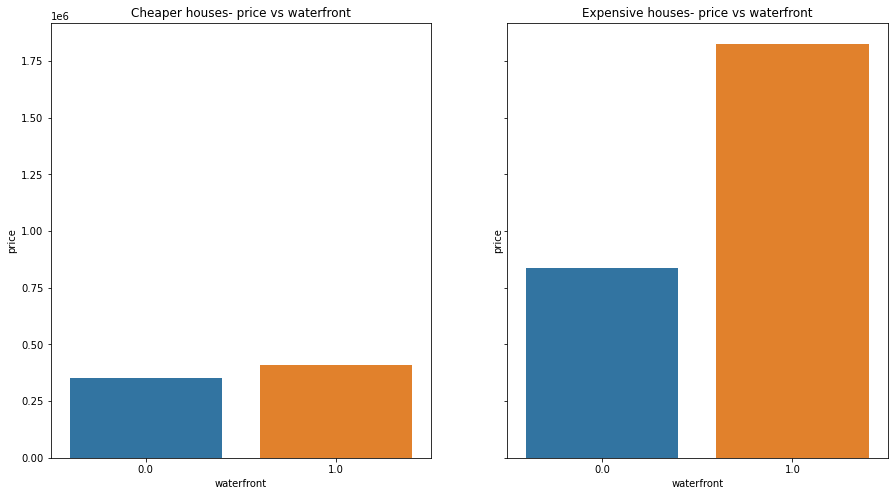

In [57]:
# grade vs waterfront
fig,(ax1,ax2) = plt.subplots(sharey = True, ncols=2, figsize=(15,8))
sns.barplot(x = 'waterfront', y= 'price', ci= None,ax = ax1, data = cheaper_df )
ax1.set_title('Cheaper houses- price vs waterfront')
sns.barplot(x = 'waterfront', y= 'price', ci= None,ax = ax2, data = expensive_df)
ax2.set_title('Expensive houses- price vs waterfront')
#plt.savefig('waterfront-price.png', dpi=300) 
plt.show()

Waterfront houses had higher prices, though its more prominent in expensive houses

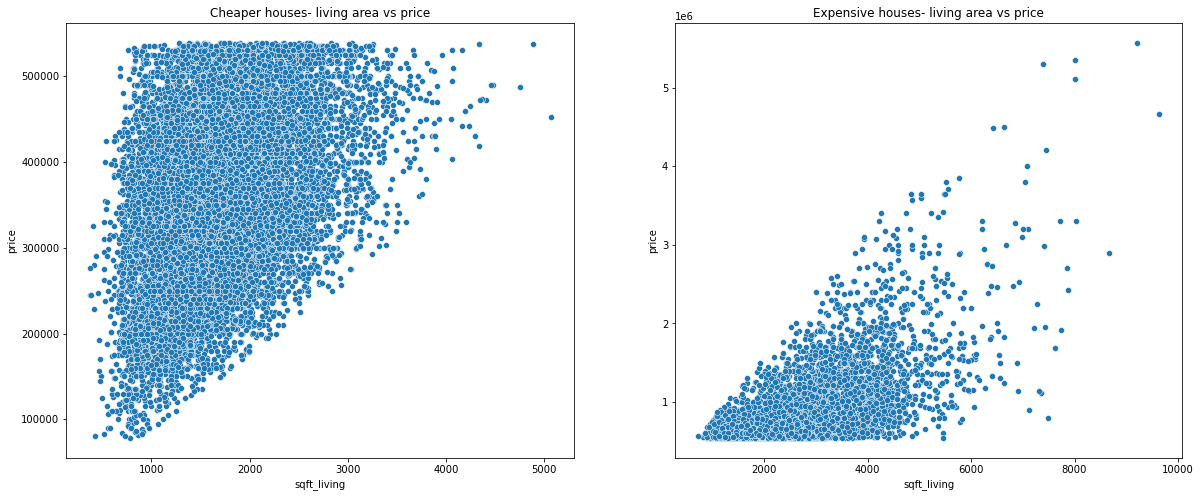

In [22]:
# sqft_living vs price
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
sns.scatterplot(x = 'sqft_living', y= 'price', ci= None,ax = ax1, data = cheaper_df )
ax1.set_title('Cheaper houses- living area vs price')
sns.scatterplot(x = 'sqft_living', y= 'price', ci= None,ax = ax2, data = expensive_df)
ax2.set_title('Expensive houses- living area vs price')
#plt.savefig('sqft-price.png', dpi=300) 
plt.show()

* There is an overall positive linear relationship between area of the house and the price
* There is a very strong relationship between the area of the living room and the price in the cheaper houses, even stronger than 
in the more expensive ones

#### Check if renovation affects house prices

In [23]:
#The first house to be renovated was built in 2003, so I will check from 2003 going back and see which have been renovated

In [24]:
df_older = df[df.yr_built <= 2003]

In [25]:
df_older['renovated'] = 0
df_older.loc[df['yr_renovated'] !=0, 'renovated'] = 1

C:\Users\charityg\AppData\Local\Temp/ipykernel_10572/161864223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_older['renovated'] = 0
C:\Users\charityg\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


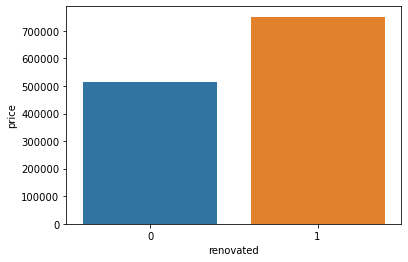

In [26]:
sns.barplot(x ='renovated',y= 'price',ci= None, data= df_older);
#plt.savefig('renovated.png', dpi=300) 
plt.show()

Renovated houses fetched higher prices

In [27]:
# drop columns i won't use
df.drop(['view','sqft_living','id'], axis = 1, inplace= True)

#### get age of house and month it was sold

In [28]:
# age of the house- change date object to datetime and get the year
df.date = pd.to_datetime(df.date)
df['year'] = pd.to_datetime(df.date).dt.year
df['age'] = df['year'] - df['yr_built']


In [29]:
# month of sale
df['month'] = pd.to_datetime(df.date).dt.month

In [30]:
#remove date and yr_built columns
df.drop(['date','year'], axis = 1, inplace = True)

#### The distribution of columns

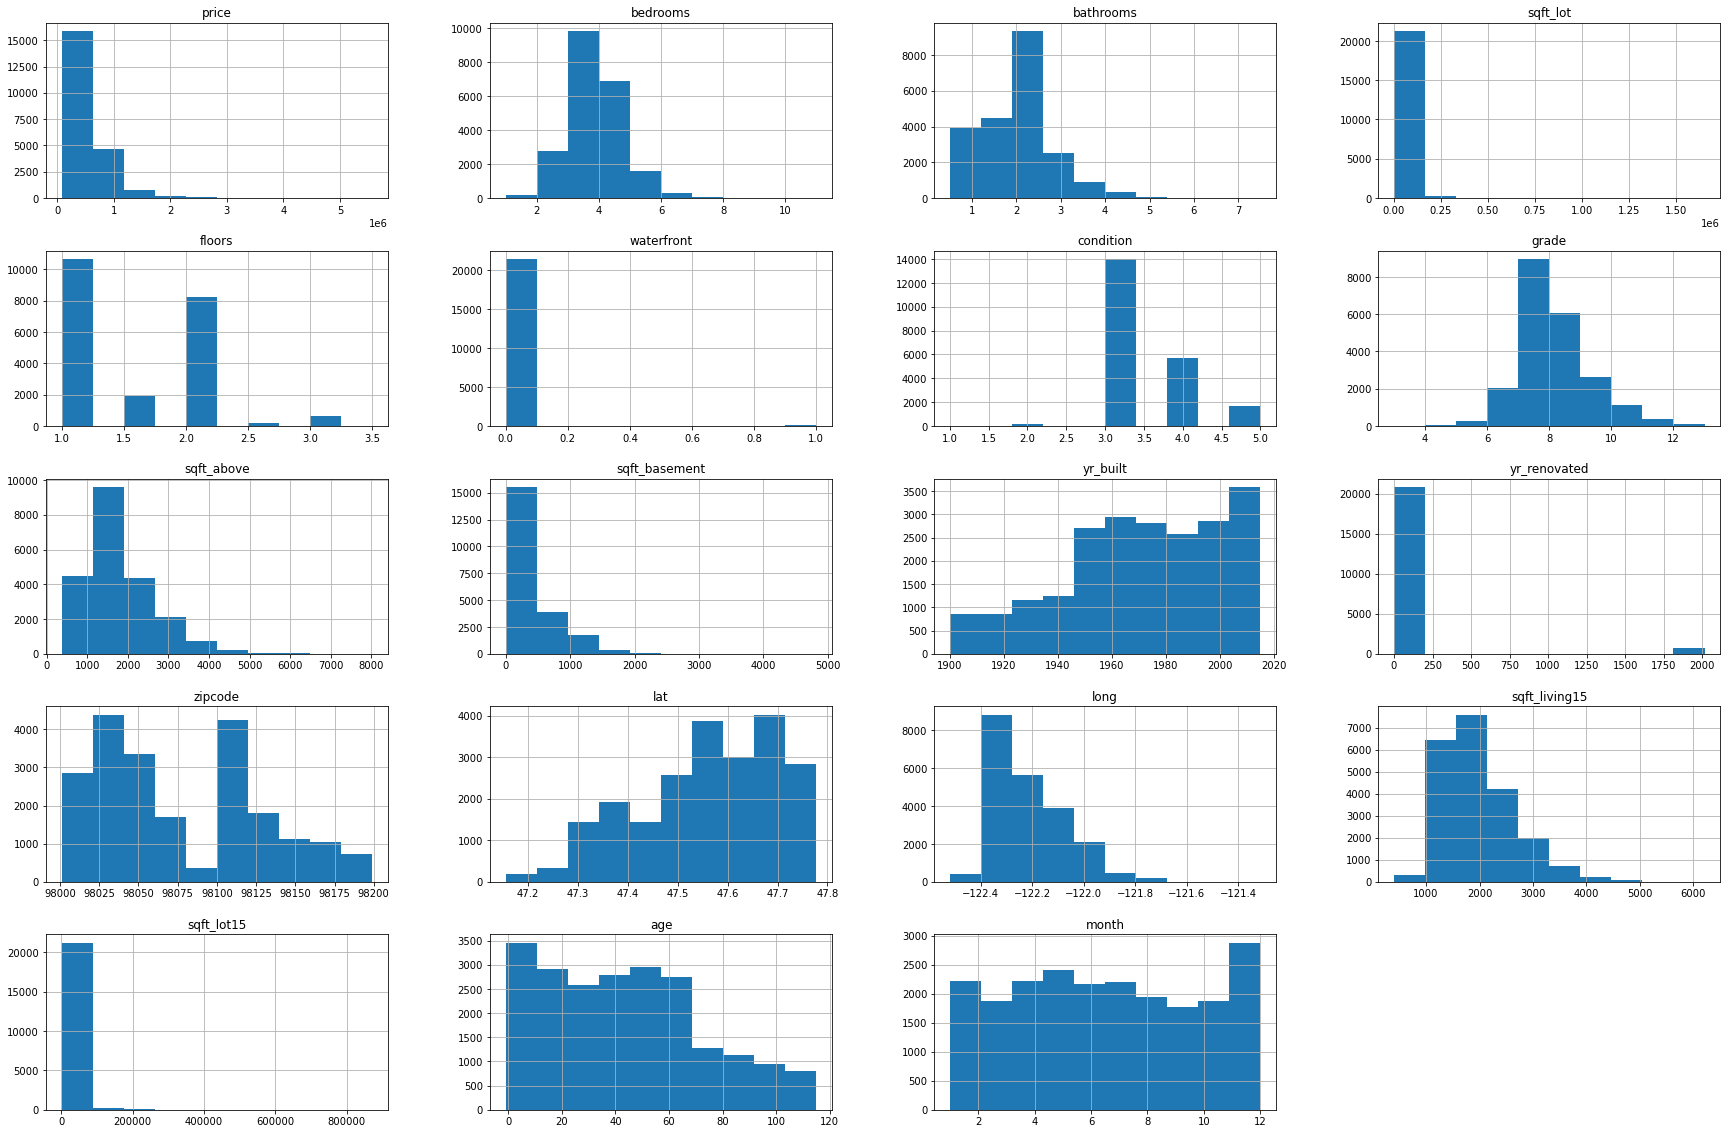

In [31]:
df.hist(figsize=(30,20))
#plt.savefig('overallhist.png', dpi=300)  
plt.show()


* Only grade, bedrooms seem to be fairly normally distributed.
* Monthly sales are almost symmetrical but there are lots of sales happening in december.
* There were many houses below 10 years, though there are also alot of houses below the age of 65 years
* A lot of houses with basement area(sqft_basement) below 250 sqft and a living area above basement(sqft_above) of between 1100-1900 sqft feet 
* Lots of houses had 1 and 2 floors 
* Lots of houses had 2 and 2.5 bathrooms
* Most of the houses were average in condition(3.0) and also on average grading of around 7-8 
* Most houses had a price range of <= 500,000

#### Some comparison between older houses and new houses

In [32]:
# I will use 12 because the first house to be renovated was built in 2003, and the last house to be built was in 2015, so 
#I will assume if a house was not ready for renovation it was still probably new, so 2015-2003=12
new_houses= df[df.age<=12]  
older_houses= df[df.age>12]

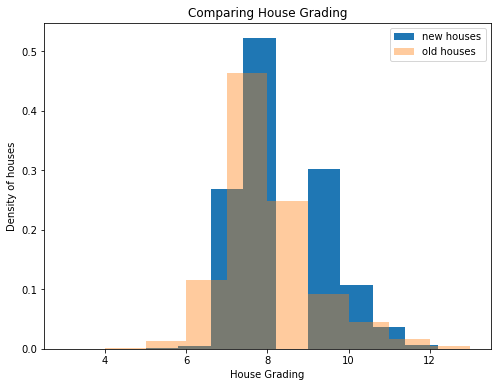

In [33]:
# compare grading
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(new_houses.grade, density = True, label='new houses');
ax.hist(older_houses.grade, density= True, label='old houses', alpha=0.4)
ax.set_title('Comparing House Grading')
ax.set_xlabel('House Grading')
ax.set_ylabel('Density of houses')
plt.legend()
#plt.savefig('gradinghist.png', dpi=300) 
plt.show()


Lots of new houses had a grading of around 7.5-8.2 while lots of older ones got 7-7.9. So new ones had better grading

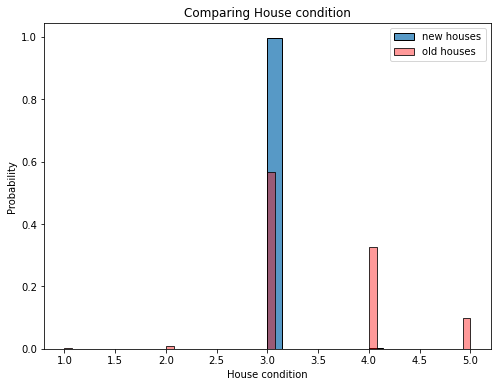

In [34]:
# compare condition
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(new_houses.condition, stat='probability', label='new houses');
sns.histplot(older_houses.condition, stat='probability', label='old houses',color='red', alpha=0.4)
ax.set_title('Comparing House condition')
ax.set_xlabel('House condition')
plt.legend()
#plt.savefig('conditionhist.png', dpi=300) 
plt.show()

The overall condition of the older houses was better,with some over 4.Most new houses condition is 3

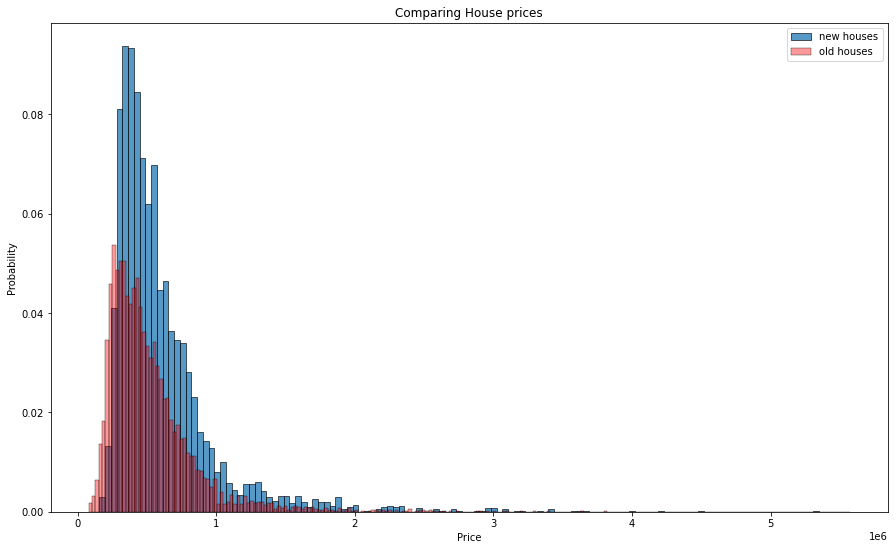

In [35]:
# compare condition
fig,ax = plt.subplots(figsize=(15,9))
sns.histplot(new_houses.price, stat='probability', label='new houses');
sns.histplot(older_houses.price, stat='probability', label='old houses',color='red', alpha=0.4)
ax.set_title('Comparing House prices')
ax.set_xlabel('Price')
plt.legend()
#plt.savefig('houseprices-oldnew.png', dpi=300) 
plt.show()

Fot the same price range, there were more new houses than older houses

#### Statistical inference using statistical models

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,month
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59,10
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,12
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82,2
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49,12
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28,2


In [37]:
# using all features
y = df['price']
X = df.drop('price', axis = 1)

In [38]:
import statsmodels.api as sm
predictors = sm. add_constant(X)
model = sm.OLS(y, predictors).fit()

model.summary()


C:\Users\charityg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2759.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:            -2.9391e+05
No. Observations:               21592   AIC:                         5.879e+05
Df Residuals:                   21573   BIC:                         5.880e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.017e+07   9.77e+06     -8.208      0.000   -9.93e+07    -6.1e+07
bedrooms      -3.974e+04   1941.488    -20.469      0.000   -4.35e+04   -3.59e+04
bathrooms      4.283e+04   3207.929     13.350      0.000    3.65e+04    4.91e+04
sqft_lot          0.1826      0.047      3.885      0.000       0.091       0.275
floors         1.298e+04   3534.204      3.672      0.000    6050.709    1.99e+04
waterfront     7.604e+05   1.67e+04     45.533      0.000    7.28e+05    7.93e+05
condition      2.962e+04   2305.835     12.844      0.000    2.51e+04    3.41e+04
grade          1.036e+05   2118.807     48.885      0.000    9.94e+04    1.08e+05
sqft_above      166.6121      3.665     45.464      0.000     159.429     173.795
sqft_basement   158.3964      4.307     36.779      0.000     149.955     166.838
yr_built       3.631e+04   4628.487      7.844      0.000    2.72e+04    4.54e+04
yr_renovated     23.9116      3.905      6.124      0.000      16.258      31.565
zipcode        -498.0386     32.246    -15.445      0.000    -561.243    -434.834
lat            5.767e+05   1.05e+04     54.948      0.000    5.56e+05    5.97e+05
long          -2.255e+05   1.29e+04    -17.488      0.000   -2.51e+05      -2e+05
sqft_living15    42.0372      3.350     12.548      0.000      35.471      48.604
sqft_lot15       -0.3640      0.072     -5.057      0.000      -0.505      -0.223
age            3.906e+04   4627.811      8.441      0.000       3e+04    4.81e+04
month          1275.7038    693.438      1.840      0.066     -83.486    2634.894
==============================================================================
Omnibus:                    14706.754   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559824.699
Skew:                           2.780   Prob(JB):                         0.00
Kurtosis:                      27.318   Cond. No.                     7.31e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R squared of 69%. The model can explain 69% variance in the house price
* The model shows there is high multicollinearity among features.
* At alpha 0.05,the last column(month) is not much significant( its p-value is 0.721). 
* Without factoring in multicollinearity,having a waterfront is one feature that significantly increases the price of the house. Other top 4 are grade,number of bathrooms, year built and condition of the house.

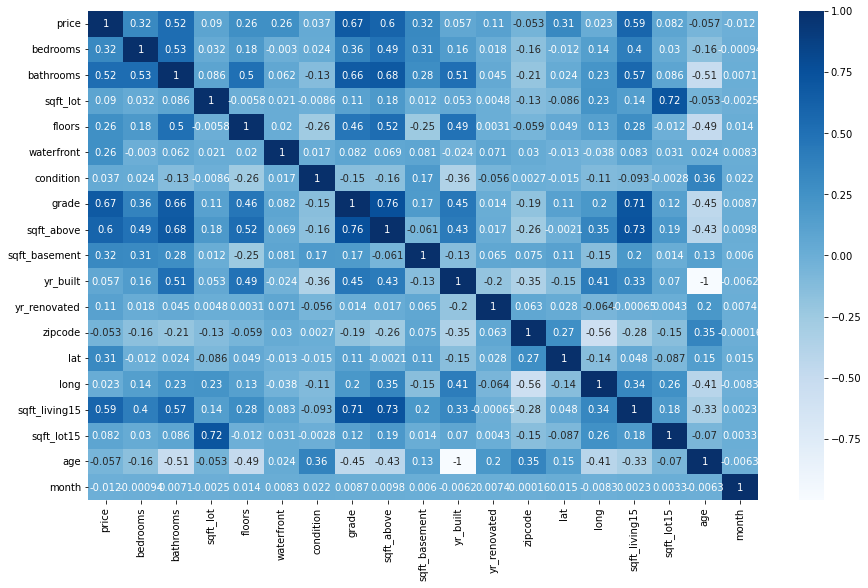

In [39]:
# check for collinearity between features
fig, ax = plt.subplots(figsize=(15,9))
corr= df.corr()
sns.heatmap(
            corr,
            cmap='Blues', 
            annot=True)
plt.show()

In [40]:
scaler= StandardScaler()


In [89]:
# Using the top 5 price determiners plus other features while still trying to remove multicollinearity
X_cols = ['waterfront','condition','grade','floors','sqft_above','yr_built','yr_renovated','bedrooms','sqft_basement','sqft_lot','bathrooms','lat','long']
y = df['price']

#some X features have big numbers, so scale
X_cols_scaled= scaler.fit_transform(df[X_cols])


In [90]:
# fitting the model
predictors1 = sm. add_constant(X_cols_scaled)
model1 = sm.OLS(y, predictors1).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     3677.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:13:09   Log-Likelihood:            -2.9419e+05
No. Observations:               21592   AIC:                         5.884e+05
Df Residuals:                   21578   BIC:                         5.885e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+05   1361.596    396.067      0.000    5.37e+05    5.42e+05
x1          6.207e+04   1380.932     44.951      0.000    5.94e+04    6.48e+04
x2          2.022e+04   1507.297     13.416      0.000    1.73e+04    2.32e+04
x3          1.327e+05   2395.696     55.374      0.000    1.28e+05    1.37e+05
x4          1063.0112   1907.892      0.557      0.577   -2676.598    4802.620
x5          1.515e+05   2782.583     54.447      0.000    1.46e+05    1.57e+05
x6         -7.757e+04   2073.471    -37.408      0.000   -8.16e+04   -7.35e+04
x7          7905.7662   1436.821      5.502      0.000    5089.491    1.07e+04
x8         -3.424e+04   1771.500    -19.330      0.000   -3.77e+04   -3.08e+04
x9          7.345e+04   1871.909     39.238      0.000    6.98e+04    7.71e+04
x10         -102.2265   1428.716     -0.072      0.943   -2902.616    2698.163
x11         3.272e+04   2487.008     13.155      0.000    2.78e+04    3.76e+04
x12         7.525e+04   1438.406     52.315      0.000    7.24e+04    7.81e+04
x13        -1.602e+04   1619.905     -9.887      0.000   -1.92e+04   -1.28e+04
==============================================================================
Omnibus:                    14560.488   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           518281.984
Skew:                           2.761   Prob(JB):                         0.00
Kurtosis:                      26.358   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Using less features is bringing the rsquared down, though multicollinearity has been handled

* From this inference with no colleration, the most positively influential features are sqft_above,grade,house location(lat),waterfront and sqft_basement
* The most negatively influential features are the number of bedrooms and year built

#### using the X_cols from the statsmodels above for linear regression 

In [91]:
y=df['price']
X= X_cols_scaled

In [92]:
# changing y to log since the price was not normally distributed
y=np.log(y)

In [93]:
# fitting the model
lmodel= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25 , random_state= 42)
lmodel.fit(X_train, y_train)

LinearRegression()

In [94]:
#scoring the training data
lmodel.score(X_train, y_train)

0.7529504805608669

In [95]:
#scoring the testind data
lmodel.score(X_test, y_test)

0.7571979624747774

The fit overall is not so good, although its a good model since the scores are not much different

#### using original dataframe in linear regression

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,month
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59,10
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,12
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82,2
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49,12
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28,2


In [49]:
y=df['price']
X=df.drop(['price','month','age'], axis=1)

In [50]:
y=np.log(y)
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [51]:
lmodel2= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25 , random_state= 42)
lmodel2.fit(X_train, y_train)

LinearRegression()

In [52]:
lmodel2.score(X_train, y_train)

0.7633962477485315

In [53]:
lmodel2.score(X_test, y_test)

0.7659412659816094

 Although using more features of the data brings a higher level of accuracy for the model, it is not so much different from using the selected columns above. Its a difference of only 1%, and taking into consideration that multicollinearity is handled through using the few selected columns, I would go with the earlier model above